# Analysis of Manual Annotations - Topical Focus of Periodicals

This notebook visualizes the topical focus (or breadth) of individual periodicals. Plots will be saved in dedicated folders. The analysis relies on manual annotation and not on topic modeling results. In the last cells, periodicals are clustered according to their topical focus using the information bottleneck method.

This notebook (mainly provided by Bernhard Geiger, Know-Center) is supposed to work with the pickled data from November 6th, 2020.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use("seaborn-whitegrid")
plt.rc('ps',fonttype = 42)
plt.rc('pdf',fonttype = 42)
plt.rcParams.update({'font.size': 20})
plt.rcParams['ps.useafm'] = True
#plt.rcParams['pdf.use14corefonts'] = True
plt.rcParams['axes.unicode_minus'] = False

In [2]:
import os
if not os.path.isdir("results/plots/topics/"):
    os.makedirs("results/plots/topics/")

In [3]:
texts_df = pd.read_pickle("../data/processed/texts_new_20201223.p")
texts_df =texts_df.reset_index()
texts_reduced=texts_df[['filename','issue_title','volume_number','issue_number','author','language','date','periodical_title']]
texts_reduced=texts_reduced.drop_duplicates()
texts_reduced['topics']=texts_df['topics'][texts_reduced.index]

In [4]:
topics_count = pd.Series()
for topics in texts_reduced["topics"]:
    for topic in topics:
        if topic not in topics_count:
            topics_count[topic] = 1
        else:
            topics_count[topic] += 1
            
for topic in topics_count.index:
    texts_reduced[topic]=0

for row in range(len(texts_reduced)):
    for topic in texts_reduced['topics'].iloc[row]:
        texts_reduced.loc[texts_reduced.index[row],topic]=1

<ipython-input-4-15111ffa44cb>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  topics_count = pd.Series()


In [5]:
# probably, this cell can be removed because there should not be any errors
# anymore in the periodical titles. I kept it for the sake of completeness.
texts_corrected=texts_reduced

texts_corrected.loc[texts_corrected.periodical_title=='Le Spectateur français ou le Nouveau Socrate moderen','journal_title']='Le Spectateur français ou le Nouveau Socrate moderne'
texts_corrected.loc[texts_corrected.periodical_title=='Le Spectateur françois ou le Nouveau Socrate moderne','journal_title']='Le Spectateur français ou le Nouveau Socrate moderne'
texts_corrected.loc[texts_corrected.periodical_title=='Le Spectateur français ou le Nouveau Socrate moderne','journal_title']='Le Spectateur français ou le Nouveau Socrate moderne'
texts_corrected.loc[texts_corrected.periodical_title=='Gazzetta urbana \t\t\t\t\t\tveneta','journal_title']='Gazzetta urbana veneta'
texts_corrected.loc[texts_corrected.periodical_title=='Gazzetta urbana veneta','journal_title']='Gazzetta urbana veneta'
texts_corrected.loc[texts_corrected.periodical_title=='Le Spectateur français ou Journal des Mœurs','journal_title']='Le Spectateur français ou Journal des Mœurs'
texts_corrected.loc[texts_corrected.periodical_title=='Le Spectateur français, ou Journal des moeurs','journal_title']='Le Spectateur français ou Journal des Mœurs'
texts_corrected = texts_corrected.drop(texts_corrected[texts_corrected.journal_title=='missing'].index)

In [6]:
topic_df=texts_corrected[['language','periodical_title']+list(topics_count.index.values)]

In [7]:
topic_df

,language,periodical_title,Idea of Man,Fashion,Manners and Customs,Morale,Economy,Critics on Nobility,Religion,Superstition,...,Other Countries,Family,Germany,America (West India),Charity,Foreign Societies,Switzerland,Apologetic of Spain,Friendship,Austria
0,French,Le Spectateur ou le Socrate moderne,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,French,Les Chiffons,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
77,Italian,Lo Spettatore italiano,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
91,Italian,Lo Spettatore italiano-piemontese,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99,Italian,Il Filosofo alla Moda,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41629,Italian,Il Filosofo alla Moda,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41639,Italian,Il Socrate veneto,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41644,Italian,Il Filosofo alla Moda,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41649,French,Le Spectateur françois ou le nouveau Socrate m...,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
topics_language=topic_df.groupby('periodical_title').sum()
number_issues=topic_df.groupby('periodical_title').count()
number_issues=number_issues['language']
topics_language=topics_language[(topics_language.T != 0).any()]
topics_language=topics_language.div(number_issues, axis=0)
topics_language.head()

,Idea of Man,Fashion,Manners and Customs,Morale,Economy,Critics on Nobility,Religion,Superstition,Culture of Conversation,Image of Women,...,Other Countries,Family,Germany,America (West India),Charity,Foreign Societies,Switzerland,Apologetic of Spain,Friendship,Austria
periodical_title,,,,,,,,,,,,,,,,,,,,,
Der Bürger,0.000000,0.000000,0.00,0.200000,0.00,0.0,0.00,0.0,0.00,0.0,...,0.00,0.000000,0.000000,0.00,0.0,0.00,0.0,0.0,0.0,0.0
Der Leipziger Spectateur,0.120000,0.000000,0.32,0.280000,0.04,0.0,0.16,0.0,0.08,0.2,...,0.04,0.040000,0.040000,0.04,0.0,0.04,0.0,0.0,0.0,0.0
Der Zuschauer,0.000000,0.000000,0.50,0.000000,0.00,0.0,0.00,0.0,0.00,0.0,...,0.00,0.000000,0.000000,0.00,0.0,0.00,0.0,0.0,0.0,0.0
Die Zuschauerin,0.666667,0.666667,0.00,0.666667,0.00,0.0,0.00,0.0,0.00,1.0,...,0.00,0.666667,0.666667,0.00,0.0,0.00,0.0,0.0,0.0,0.0
El Amigo y Corresponsal del Pensador,0.000000,1.000000,0.25,0.000000,0.00,0.0,0.00,0.0,0.00,0.0,...,0.00,0.000000,0.000000,0.00,0.0,0.00,0.0,0.0,0.0,0.0


In [9]:
number_issues.index

Index(['Der Bürger', 'Der Leipziger Spectateur', 'Der Zuschauer',
       'Die Zuschauerin', 'El Amigo y Corresponsal del Pensador',
       'El Apologista Universal', 'El Argonauta español',
       'El Belianís literario', 'El Catón Compostelano', 'El Censor',
       'El Corresponsal del Apologista', 'El Corresponsal del Censor',
       'El Curioso Entretenido', 'El Duende Crítico', 'El Duende de Madrid',
       'El Duende especulativo sobre la vida civil', 'El Escritor sin título',
       'El Filósofo á la Moda', 'El Juzgado Casero', 'El Murmurador imparcial',
       'El Observador', 'El Pensador', 'El Pensador Mexicano',
       'El Regañón general', 'El Teniente del Apologista',
       'Gazzetta urbana veneta', 'Gazzetta veneta', 'Gli Osservatori veneti',
       'Il Caffè', 'Il Filosofo alla Moda', 'Il Socrate veneto',
       'L'Indigent philosophe ou l'homme sans souci', 'La Bagatelle',
       'La Bigarure', 'La Frusta Letteraria di Aristarco Scannabue',
       'La Pensadora Gaditana

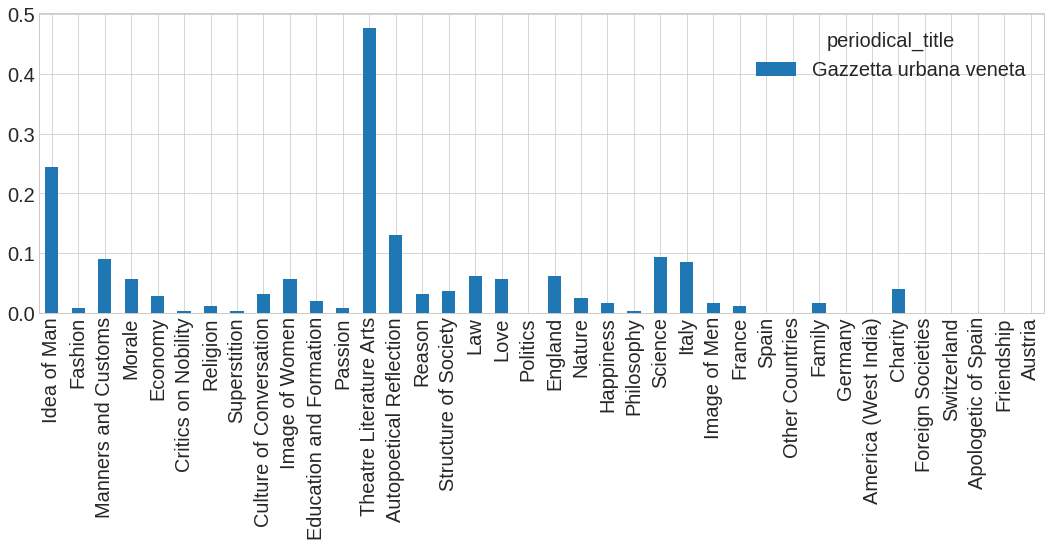

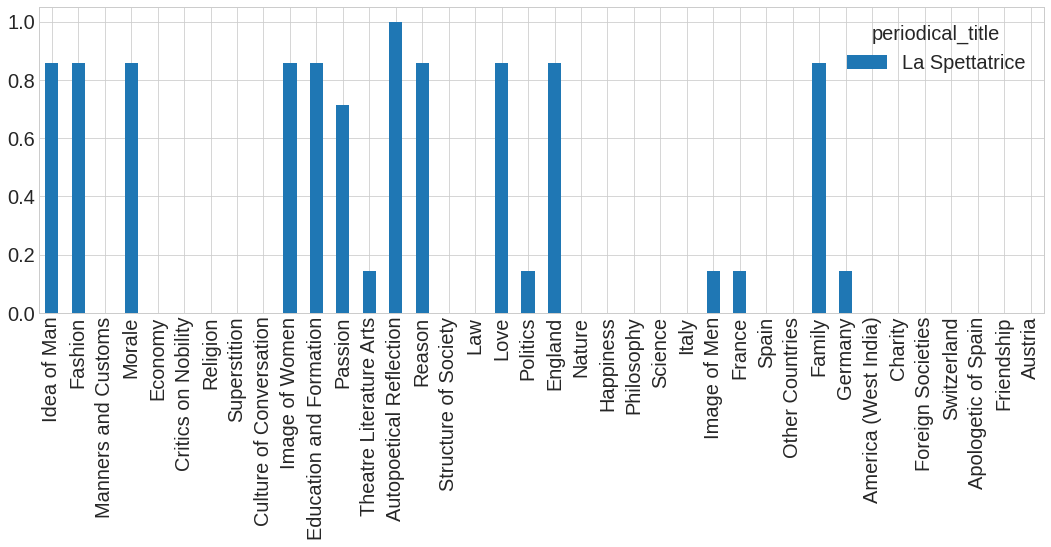

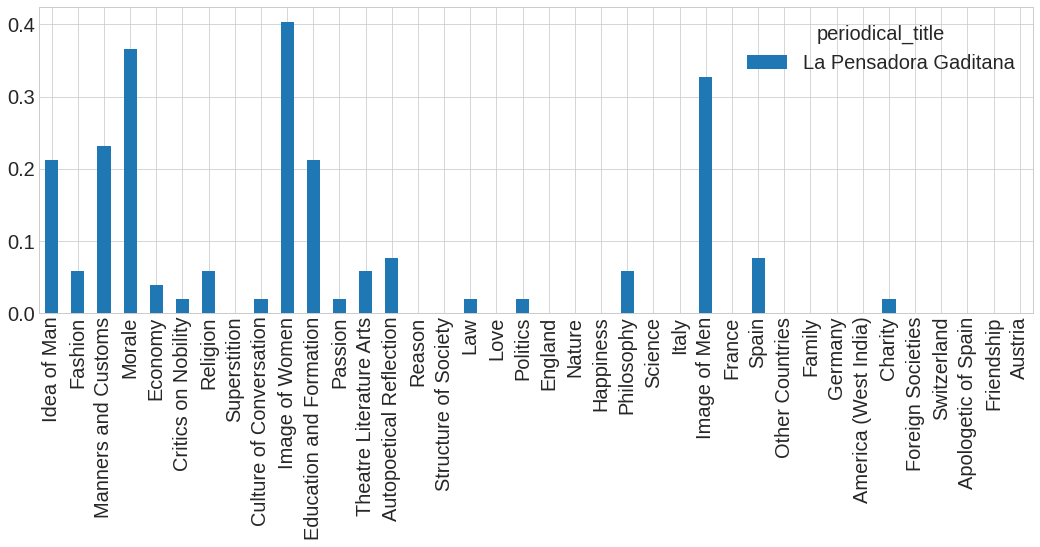

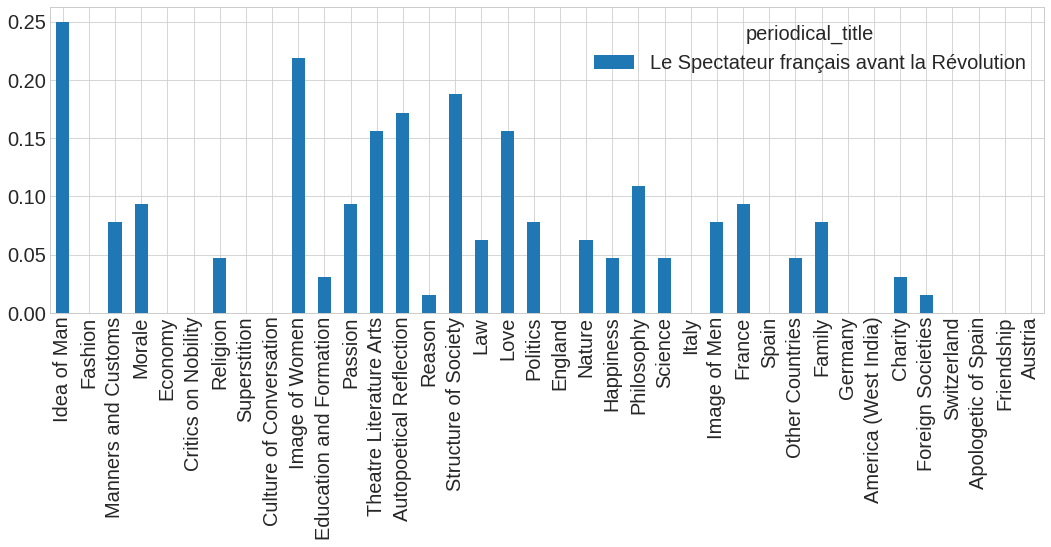

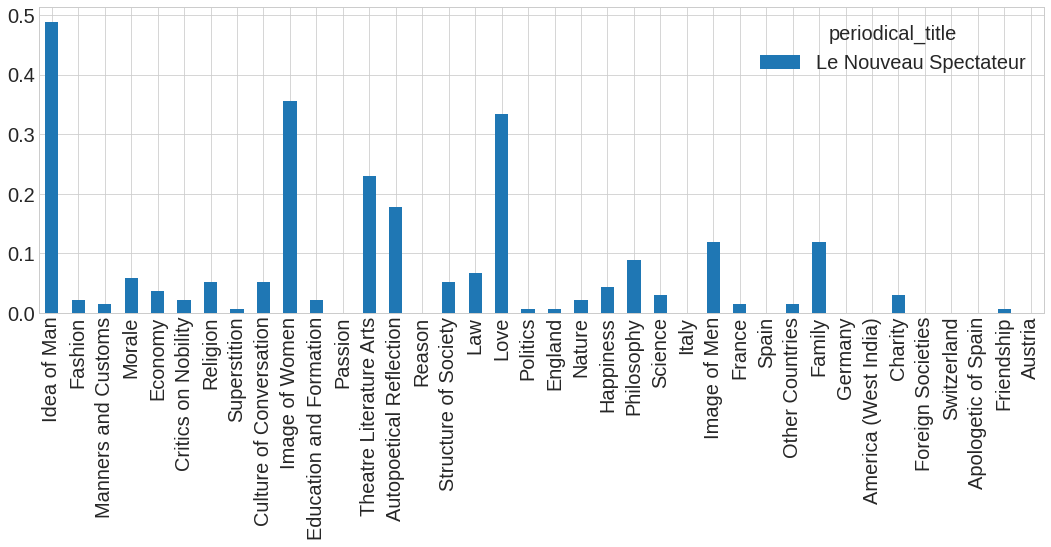

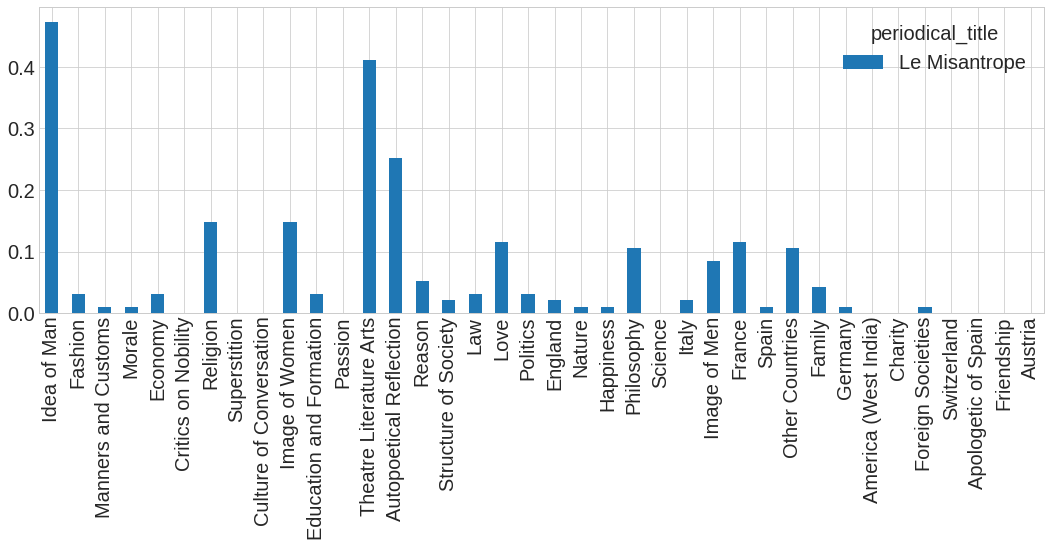

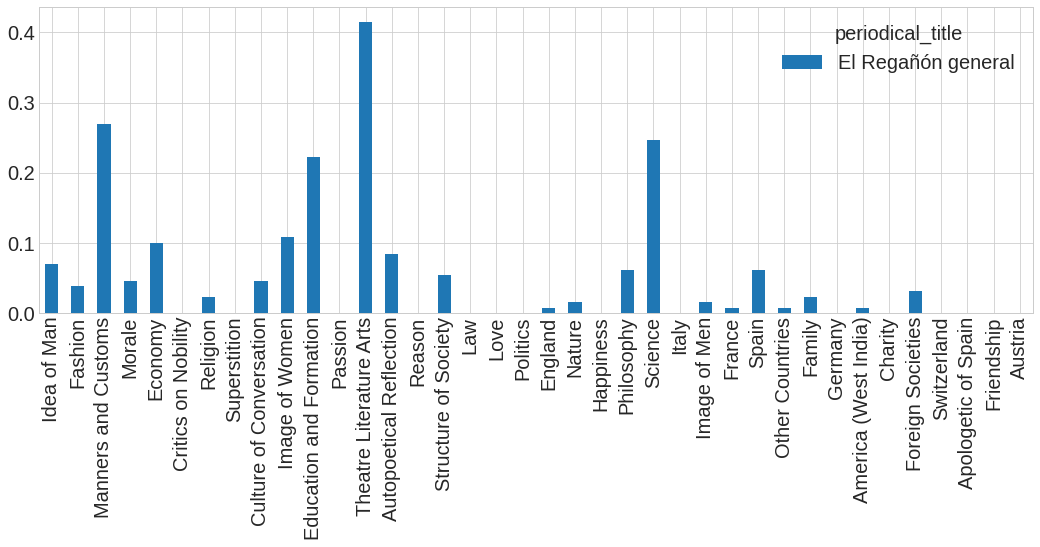

In [10]:
periodical_list=['Gazzetta urbana veneta','La Spettatrice','La Pensadora Gaditana','Le Spectateur français avant la Révolution','Le Nouveau Spectateur','Le Misantrope','El Regañón general']
for title in periodical_list:
    topics_language.loc[topics_language.index==title].T.plot(kind='bar',figsize=(15,8))
    plt.tight_layout()
    plt.savefig('results/plots/topics/histograms/'+title+'.pdf')

In [11]:
language_journal=topic_df.pivot_table(values='Switzerland',index='periodical_title',columns='language',aggfunc='count')
language_journal[language_journal > 0] = 1
language_journal = language_journal.fillna(0)
language_journal.head()

language,English,French,German,Italian,Portuguese,Spanish; Castilian
periodical_title,,,,,,
Der Bürger,0.0,0.0,1.0,0.0,0.0,0.0
Der Leipziger Spectateur,0.0,0.0,1.0,0.0,0.0,0.0
Der Zuschauer,0.0,0.0,1.0,0.0,0.0,0.0
Die Zuschauerin,0.0,0.0,1.0,0.0,0.0,0.0
El Amigo y Corresponsal del Pensador,0.0,0.0,0.0,0.0,0.0,1.0


In [12]:
Number_of_Clusters=8

from IB import *
ds = dataset(pxy=topics_language.values/np.sum(topics_language.values))
ds.clamped=True
m=model(ds=ds,alpha=0,beta=50,Tmax=Number_of_Clusters)
m.fit(keep_steps=True)

import os.path
fname='results__all_' + str(m.Tmax) + '.obj'
if not os.path.isfile(fname):
    file_result = open(fname, 'wb')
    pickle.dump(m, file_result)
    print('Stored first solution')
file_result = open(fname, 'rb')
old_m=pickle.load(file_result)
if (old_m.Tmax == m.Tmax) and (m.iyt>old_m.iyt):
    file_result = open(fname, 'wb')
    pickle.dump(m, file_result)
    print('Better solution found')

step 1: I(X,T) = 2.944, H(T) = 2.944, T = 8, H(X) = 5.726, I(Y,T) = 0.241, I(X,Y) = 1.155, L = -9.089
******************** Beginning IB fit with the following parameters ********************
alpha = 0.00, beta = 50.0, Tmax = 8, p0 = None, wav = None, geo = False,
ctol_abs = 1e-04, ctol_rel = 0e+00, cthresh = 1, ptol = 1e-08, zeroLtol = 0e+00
smoothing_type = None, smoothing_center = None, s = None, d = None
****************************************************************************************
step 2: I(X,T) = 2.904, H(T) = 2.904, T = 8, H(X) = 5.726, I(Y,T) = 0.453, I(X,Y) = 1.155, L = -19.731
step 3: I(X,T) = 2.884, H(T) = 2.884, T = 8, H(X) = 5.726, I(Y,T) = 0.504, I(X,Y) = 1.155, L = -22.317
step 4: I(X,T) = 2.891, H(T) = 2.891, T = 8, H(X) = 5.726, I(Y,T) = 0.516, I(X,Y) = 1.155, L = -22.888
step 5: I(X,T) = 2.891, H(T) = 2.891, T = 8, H(X) = 5.726, I(Y,T) = 0.516, I(X,Y) = 1.155, L = -22.888
converged due to small absolute changes in objective
single-cluster mapping not better; 

<ipython-input-13-4e4fb59bd554>:28: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()
<ipython-input-13-4e4fb59bd554>:28: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()
<ipython-input-13-4e4fb59bd554>:28: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()
<ipython-input-13-4e4fb59bd554>:16: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  wedges, texts, autotexts = axs[Cluster][0].pie(relevant_topics, autopct='%1.f%%', \
<ipython-input-13-4e4fb59bd554>:28: Us

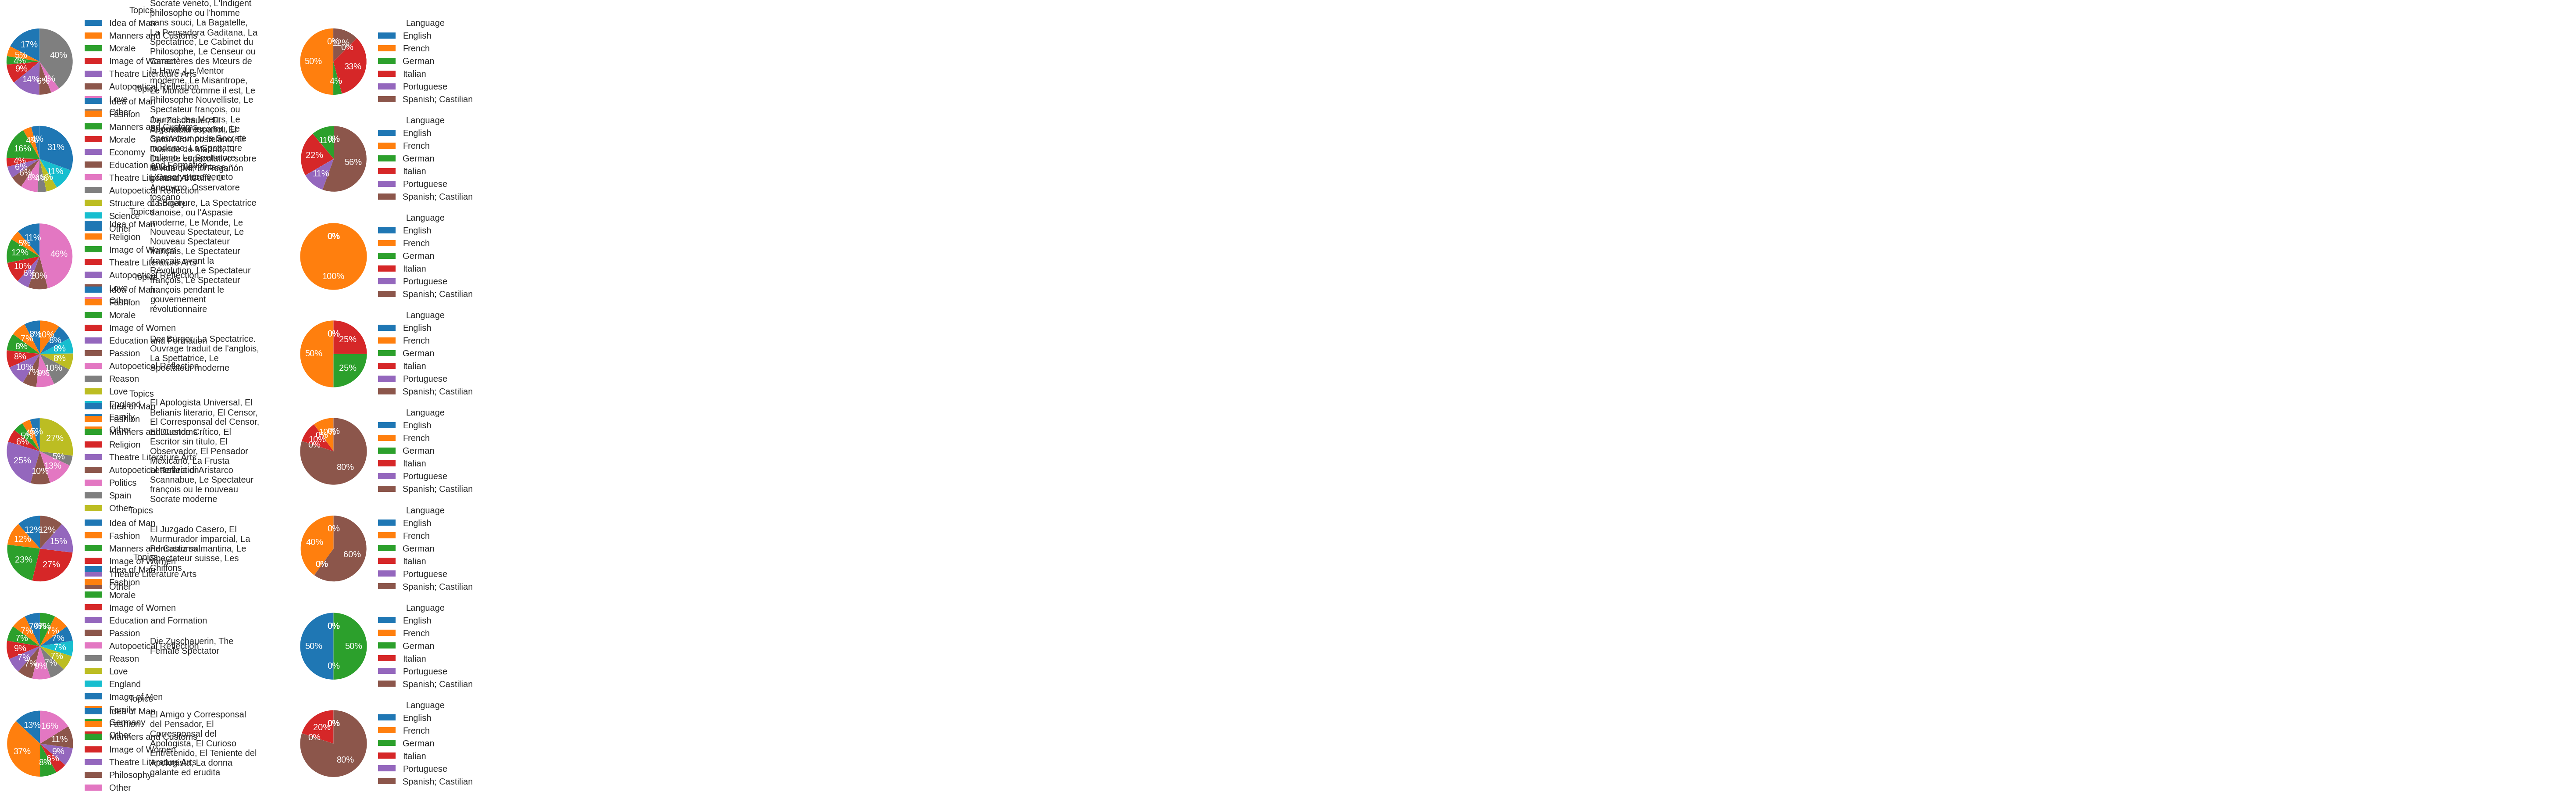

In [13]:
Threshold=0.04

file_result = open('results__all_' + str(Number_of_Clusters) + '.obj', 'rb')
best_m=pickle.load(file_result)

import matplotlib.pyplot as plt
f, axs = plt.subplots(Number_of_Clusters, 3, figsize=(15,4*Number_of_Clusters))
f.subplots_adjust(wspace = 1) 
for Cluster in range(Number_of_Clusters):
    topic_dist=topics_language.loc[best_m.qt_x[Cluster]==1,:].mean()
    topic_dist=topic_dist/np.sum(topic_dist.values)
    relevant_topics=topic_dist[topic_dist>0.04]
    relevant_topics['Other']=max(0,1-sum(relevant_topics))
    

    wedges, texts, autotexts = axs[Cluster][0].pie(relevant_topics, autopct='%1.f%%', \
            startangle=90,textprops=dict(color="w"))
    axs[Cluster][0].legend(wedges, relevant_topics.index,title="Topics",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
    axs[Cluster][0].axis('equal')
    axs[Cluster][1].axis([0, 1, 0, 1])
    axs[Cluster][1].axis('off')
    txt=axs[Cluster][1].text(0, 0.5, ', '.join(topics_language.index[best_m.qt_x[Cluster]==1].values), ha='left',va='center', wrap=True)
    txt._get_wrap_line_width = lambda : 250.
    wedges, texts, autotexts = axs[Cluster][2].pie(language_journal.loc[best_m.qt_x[Cluster]==1,:].sum(), autopct='%1.f%%', \
            startangle=90,textprops=dict(color="w"))
    axs[Cluster][2].legend(wedges, language_journal.columns,title="Language",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
    axs[Cluster][2].axis('equal')
    f.show()
    f.savefig("results/plots/topics/all_topics_summary_"+str(Number_of_Clusters)+"_Clusters.pdf",bbox_inches='tight')

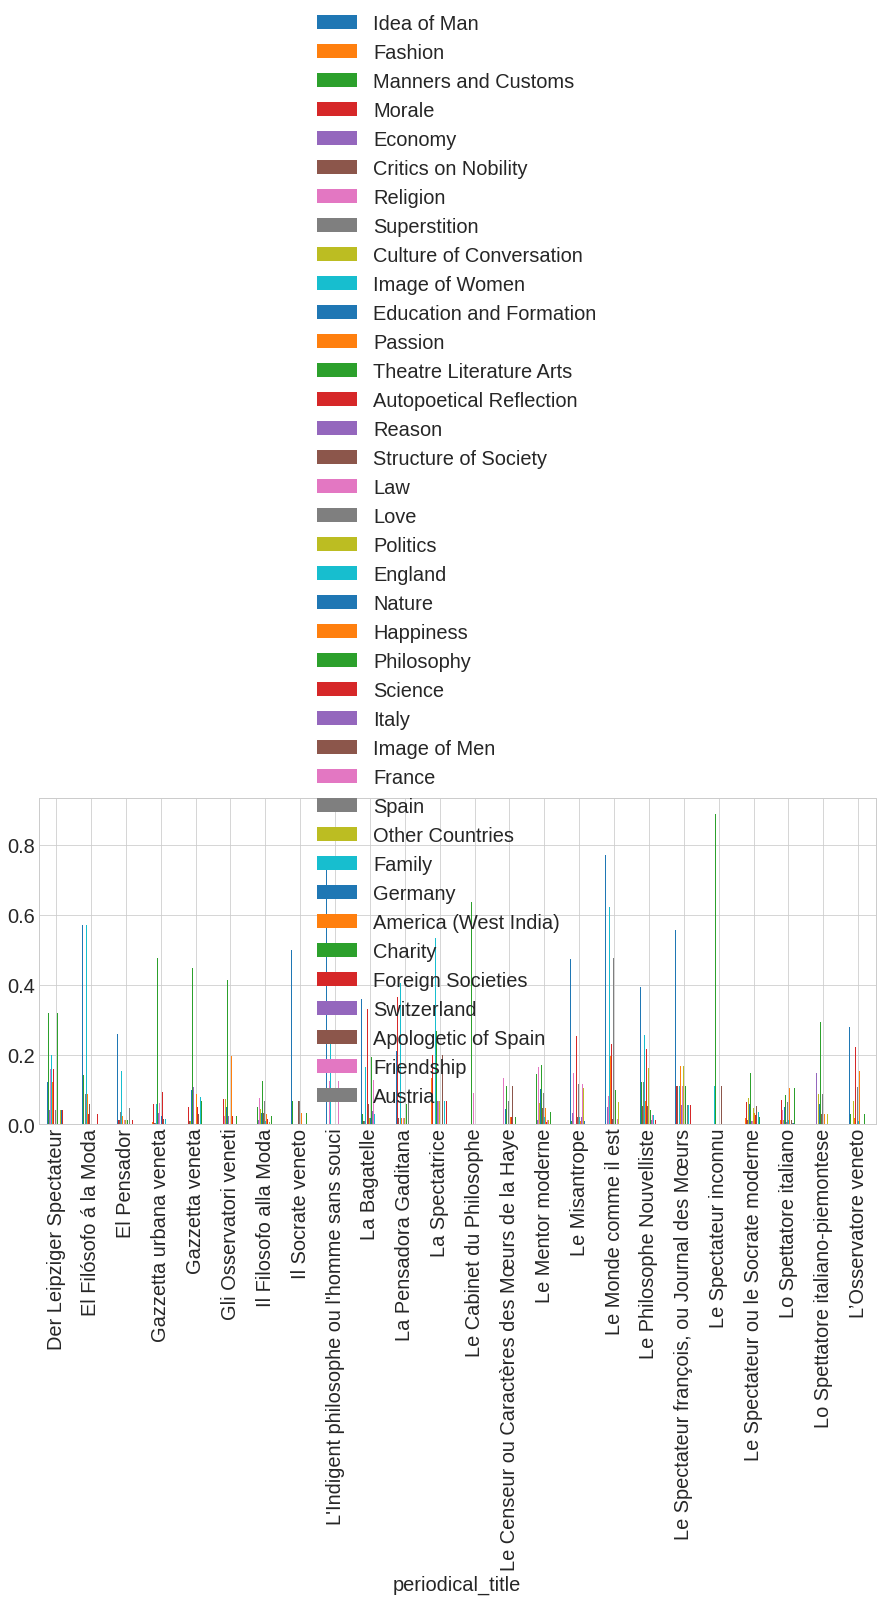

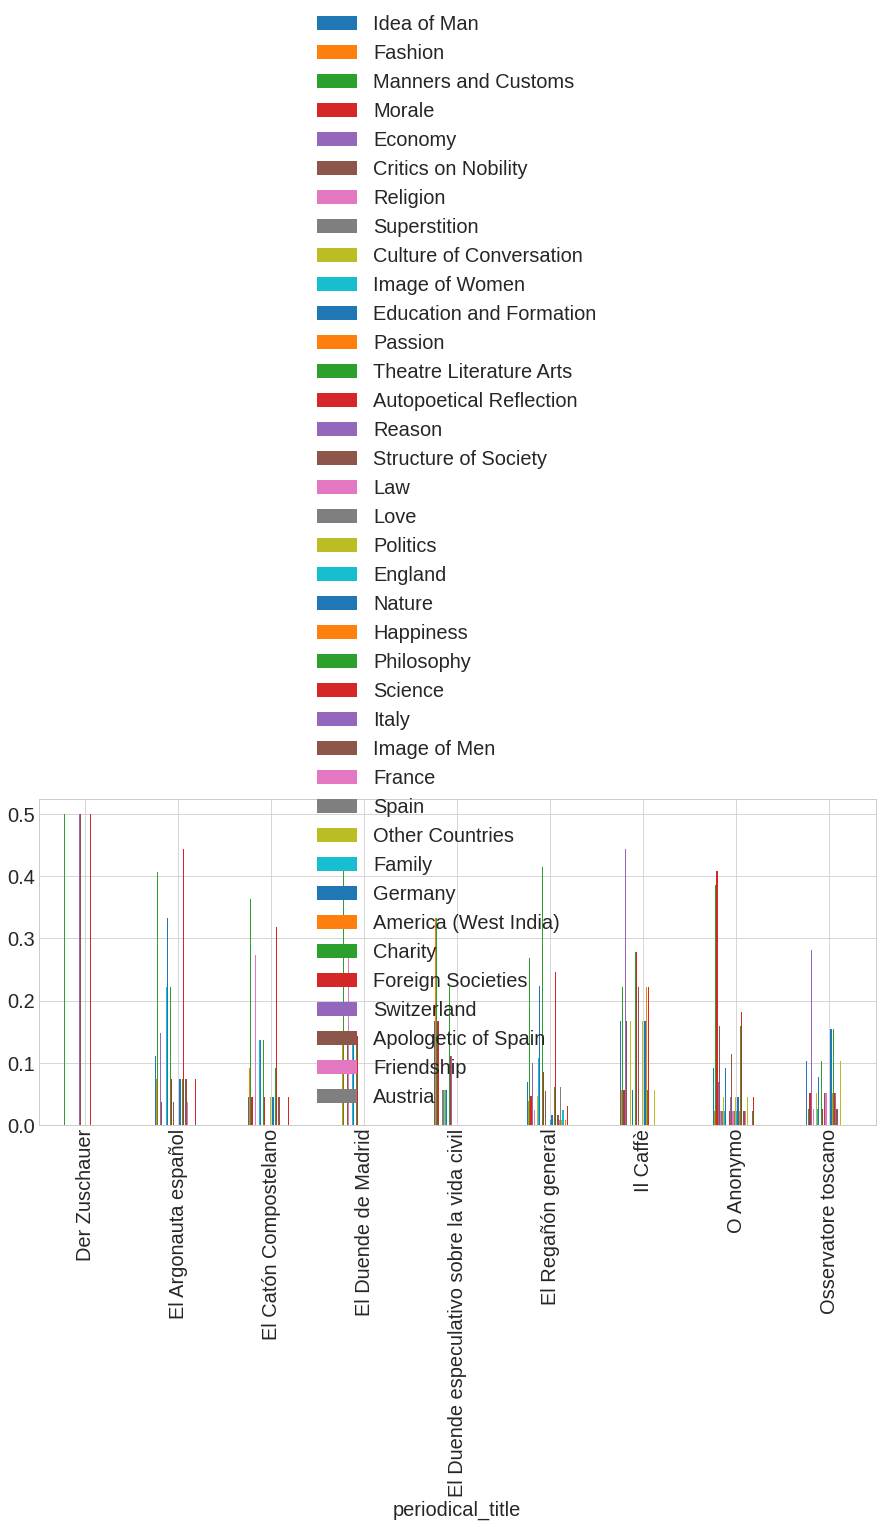

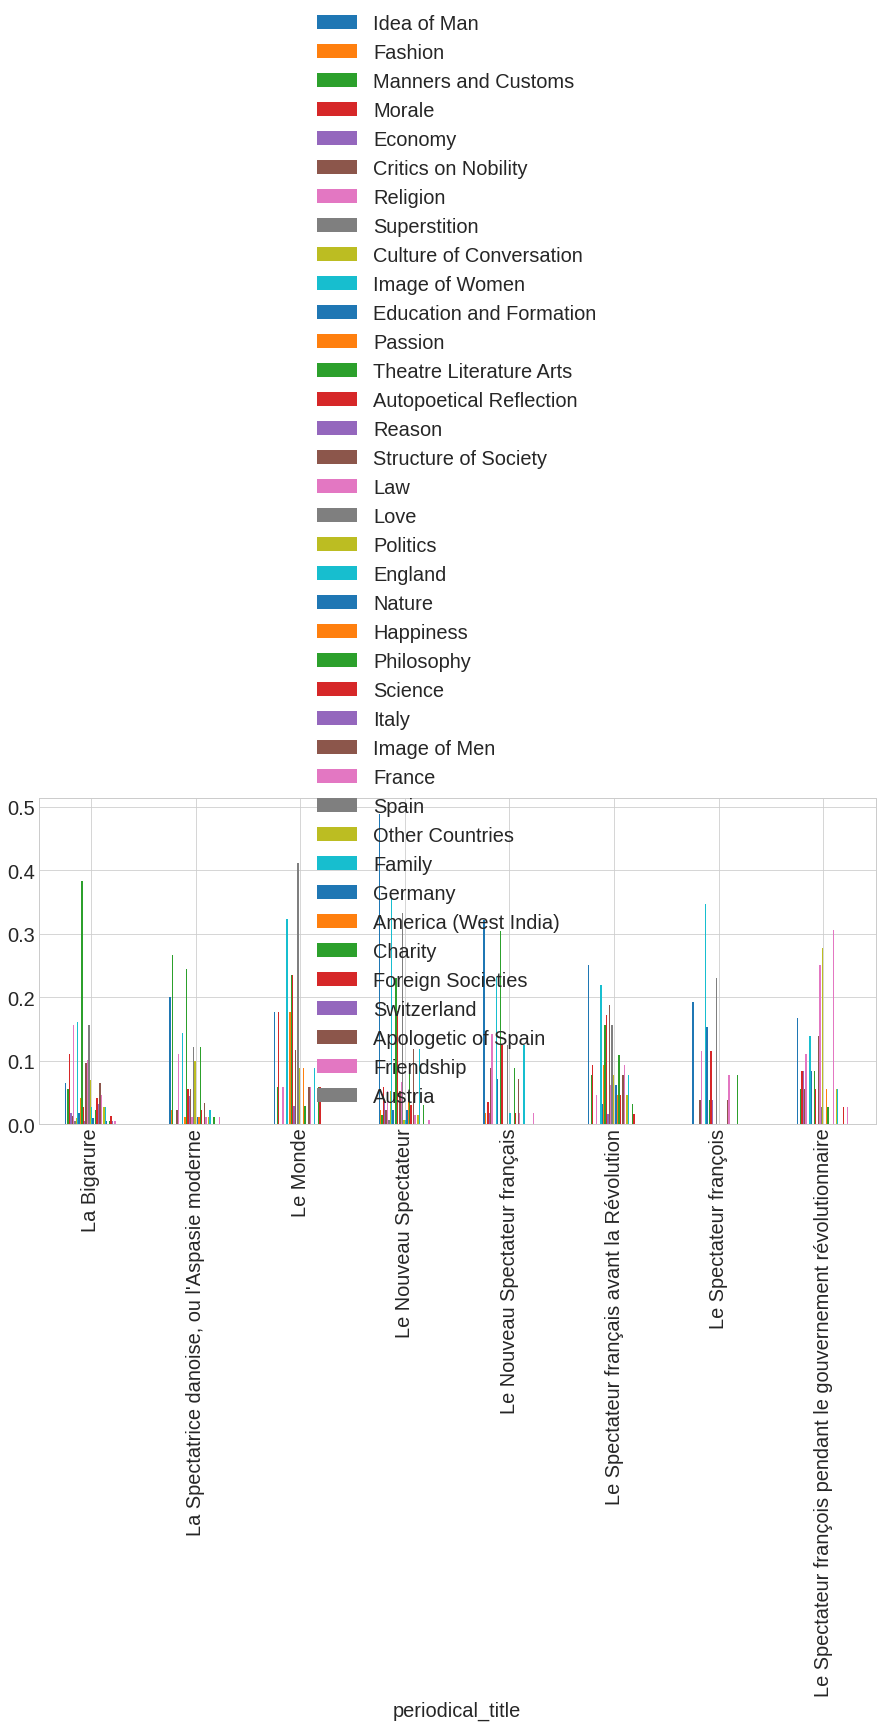

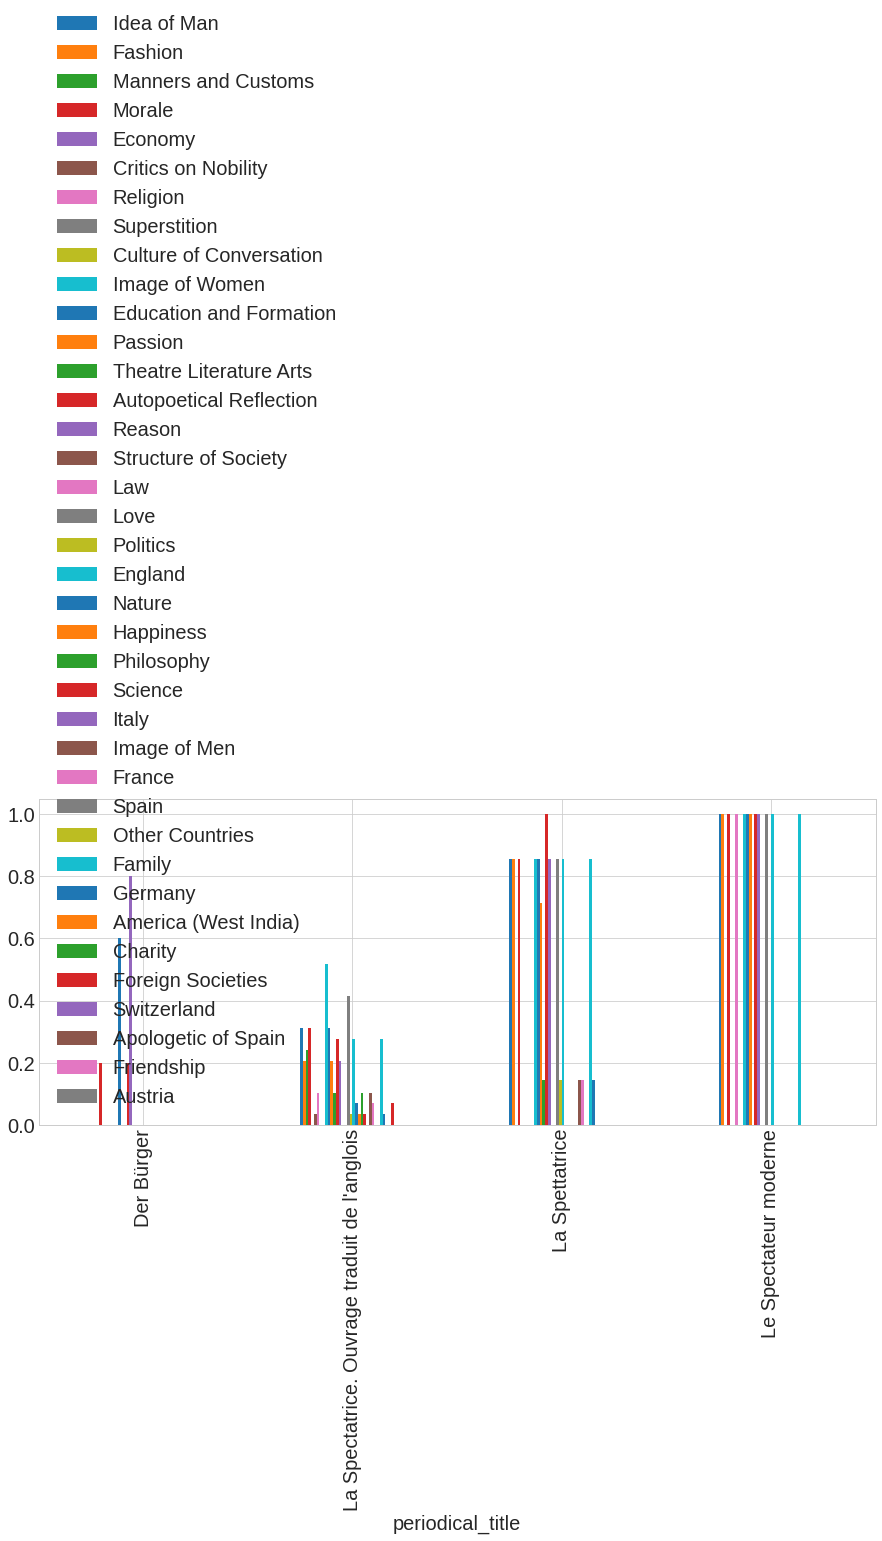

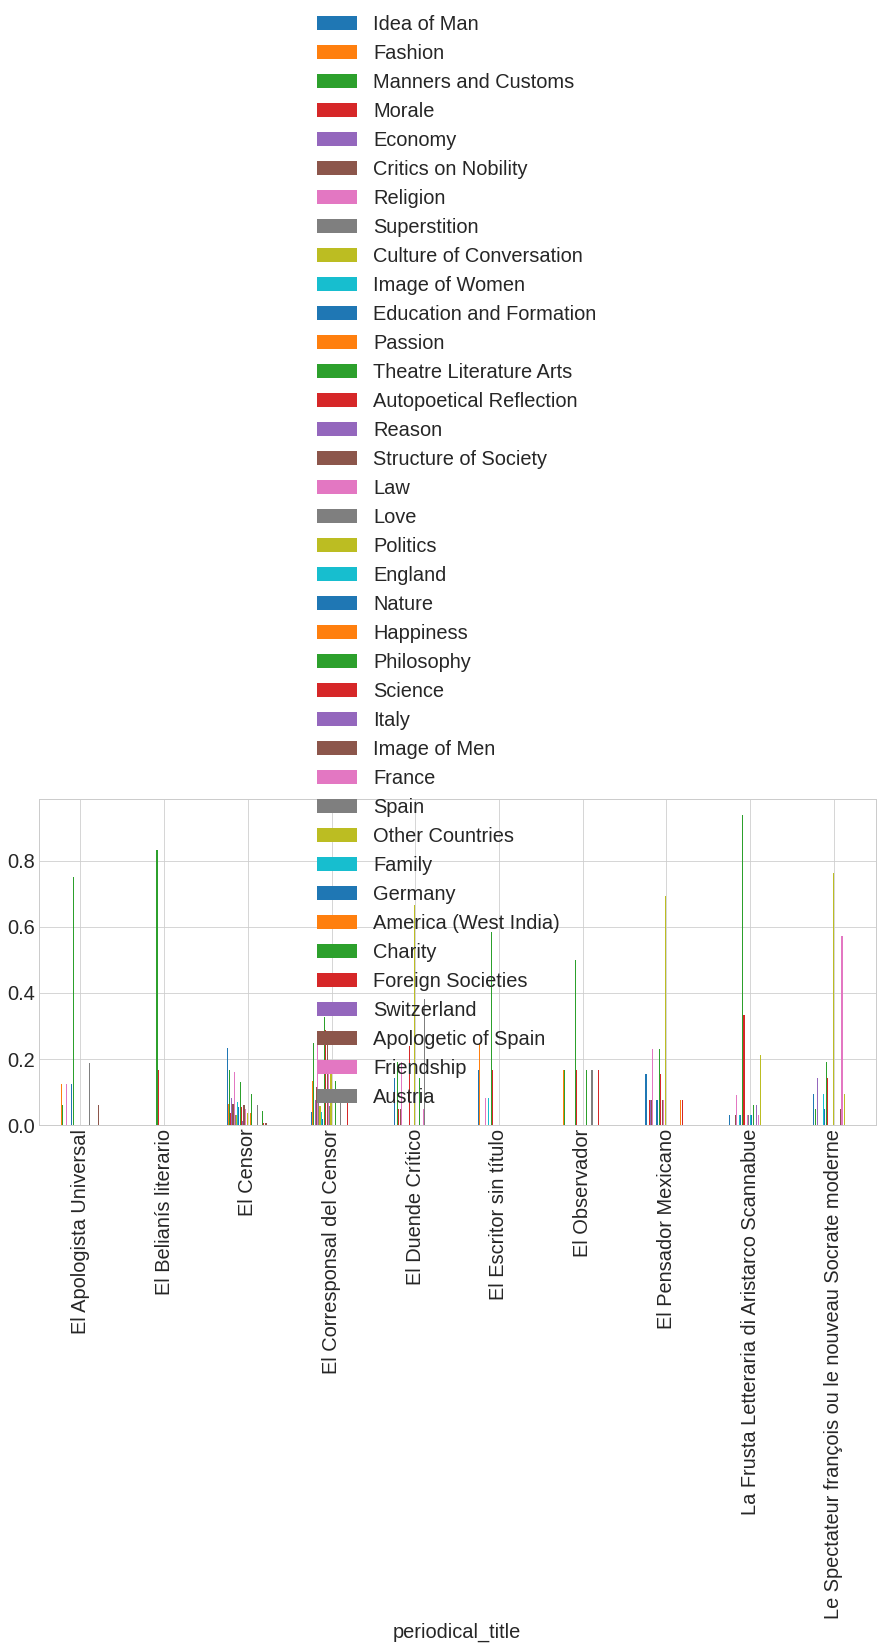

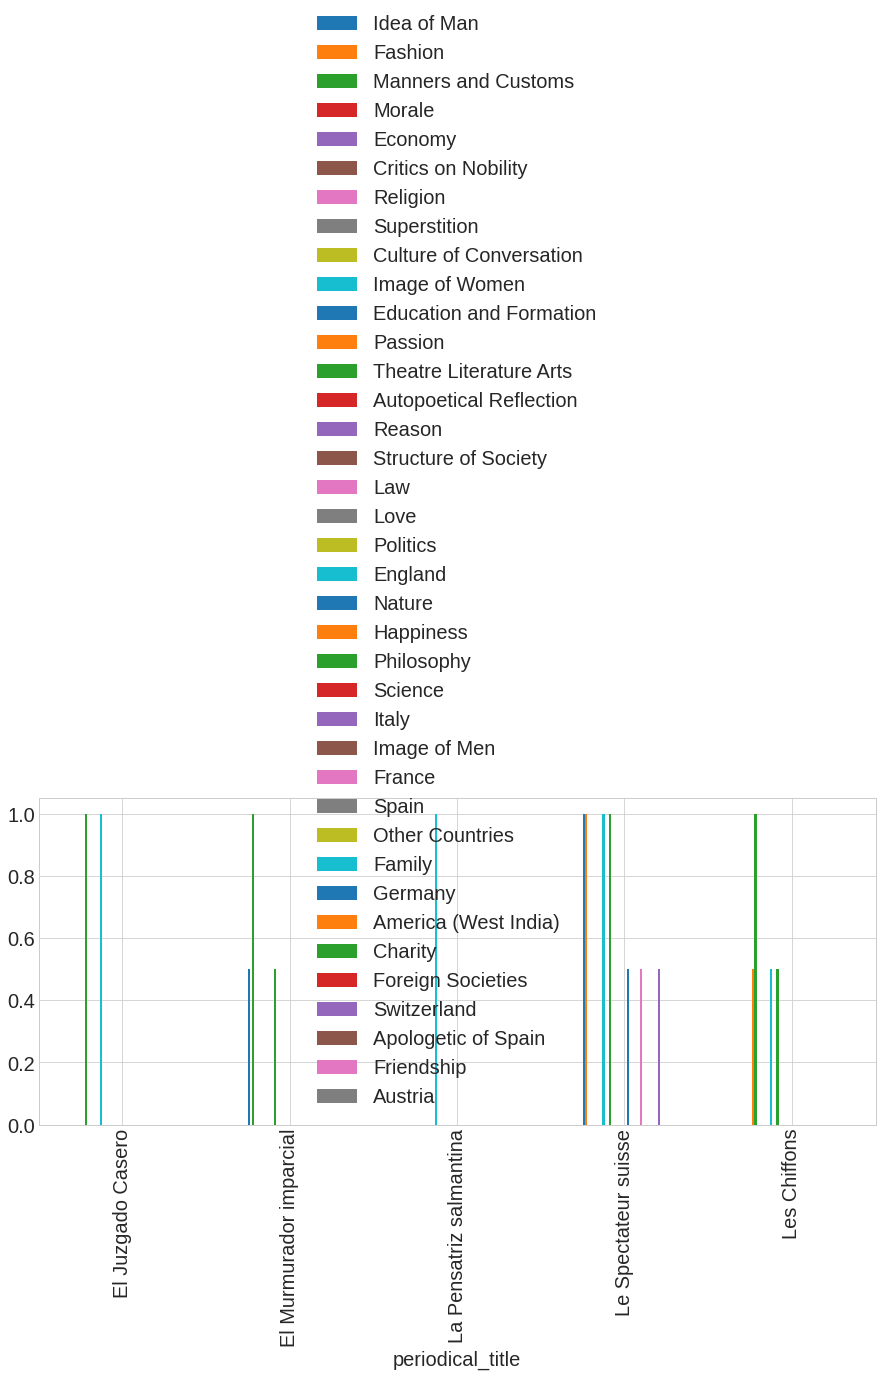

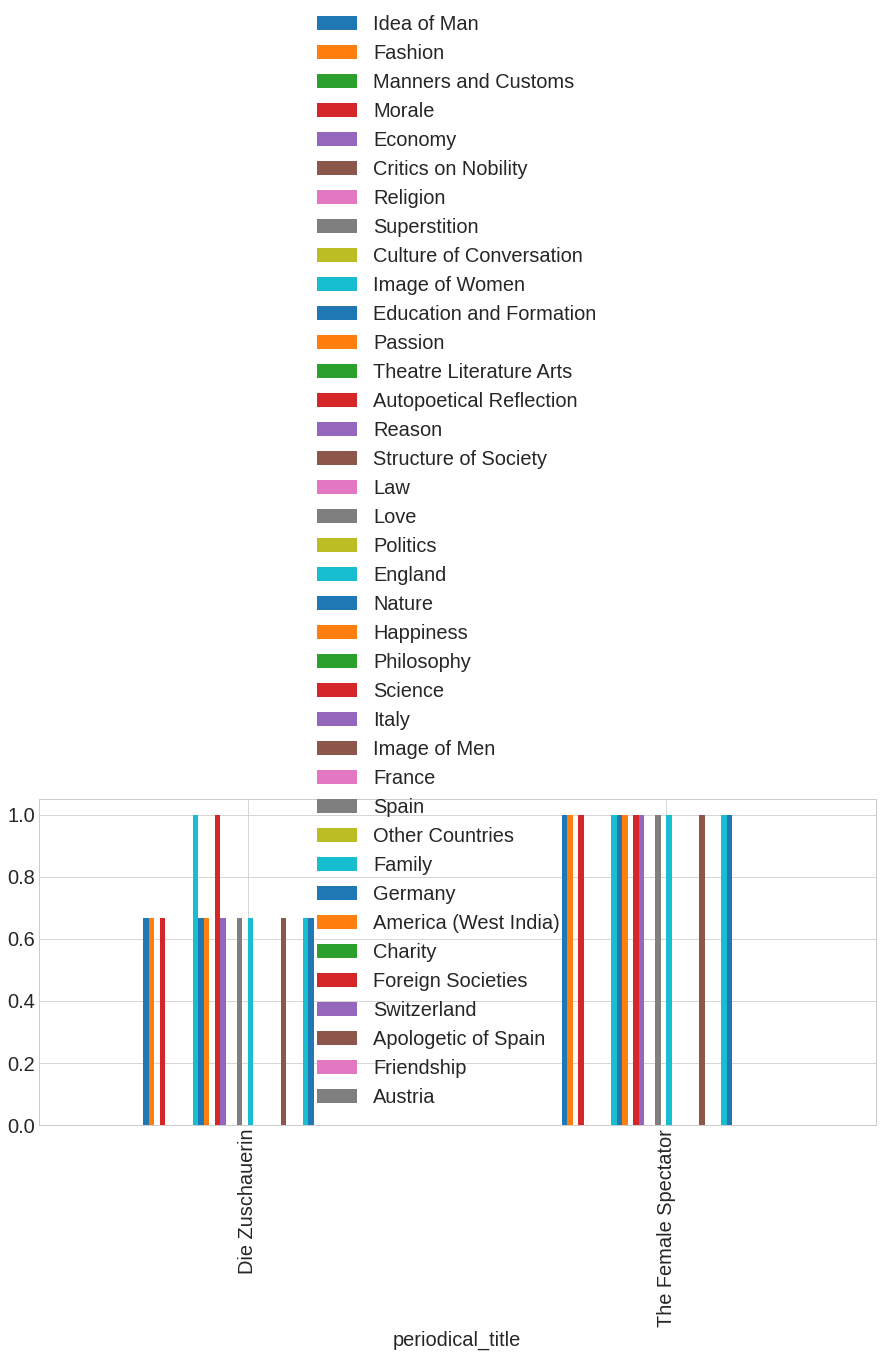

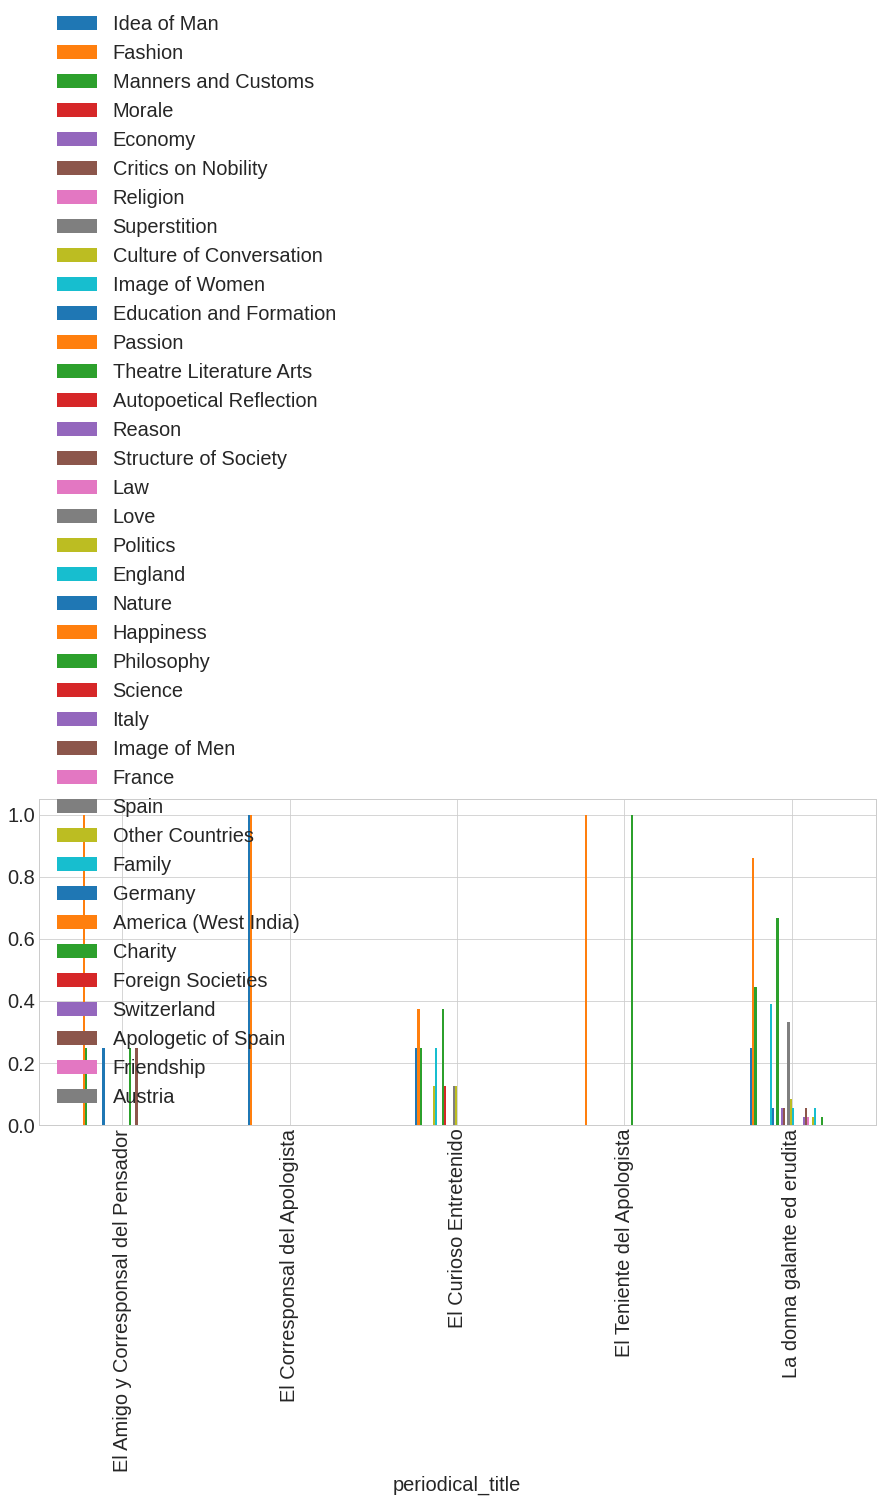

In [14]:
for Cluster in range(Number_of_Clusters):
    axs[Cluster]=topics_language.loc[best_m.qt_x[Cluster]==1,:].plot(kind='bar',figsize=(15,6))